<a href="https://colab.research.google.com/github/DaniilRyb/OIRS/blob/master/DZ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучения модели для задачи Titanic - Machine Learning from Disaster

In [3]:
import pandas as pd #анализ данных
import numpy as np # Научные вычисления
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

Добавим датасет с данными для обучения с помощью метода логистической регрессии

In [4]:
data_train = pd.read_csv("DZ2/train.csv")
data_test = pd.read_csv("DZ2/test.csv")
data_gender_submission = pd.read_csv("DZ2/gender_submission.csv")

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
data_train[data_train['Sex'].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [10]:
data_train[data_train['Sex'].str.match("male")].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

Cколько людей выжило, разделенных по 3 классам:



<AxesSubplot:xlabel='Survived', ylabel='count'>

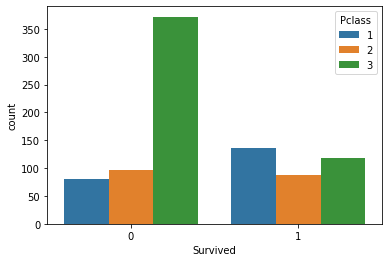

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=data_train)

Cколько людей выжило, разделенных по полу:

<AxesSubplot:xlabel='Survived', ylabel='count'>

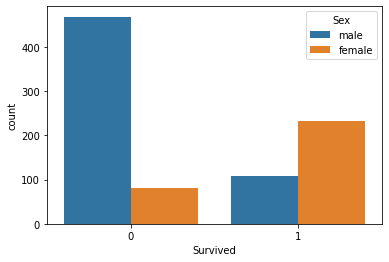

In [12]:
sns.countplot(x='Survived', hue='Sex', data=data_train)

Функция для вычисления возраста относительно соответствующего среднего возраста по классу:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

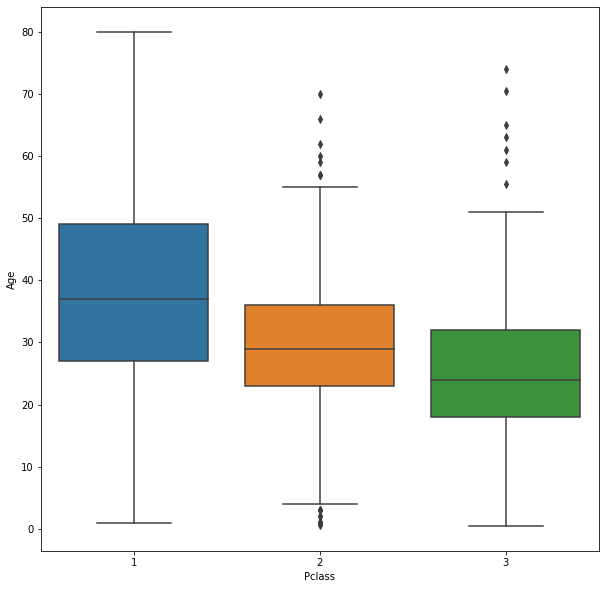

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=data_train)

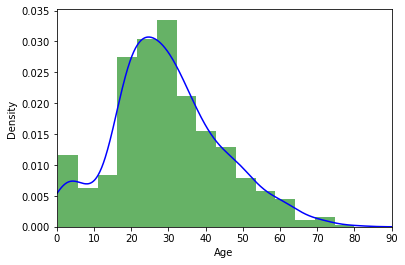

In [14]:
ax = data_train["Age"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
data_train["Age"].plot(kind='density', color='blue')
ax.set(xlabel='Age')
plt.xlim(0,90)
plt.show()

In [15]:
# вычисляем средний арифметический возраст
print('The mean of "Age" is %.2f' %(data_train["Age"].mean(skipna=True)))
# вычисляем медианный возраст
print('The median of "Age" is %.2f' %(data_train["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


Пассажиры, поднявшиеся на борт, сгруппированы по портам посадки (C = Шербур, Q = Квинстаун, S = Саутгемптон
S    644
C    168
Q     77
Name: Embarked, dtype: int64


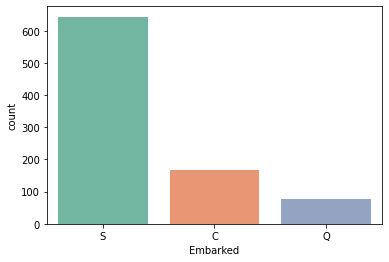

In [16]:
print('Пассажиры, поднявшиеся на борт, сгруппированы по портам посадки (C = Шербур, Q = Квинстаун, S = Саутгемптон')
print(data_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=data_train, palette='Set2')
plt.show()

2.4. Окончательные корректировки данных (обучение и тестирование). Основываясь на оценке отсутствующих значений в наборе данных, внесем некоротые изменения

In [17]:
data_train = data_train.copy()
data_train["Age"].fillna(data_train["Age"].median(skipna=True), inplace=True)
data_train["Embarked"].fillna(data_train['Embarked'].value_counts().idxmax(), inplace=True)
data_train.drop('Cabin', axis=1, inplace=True)

In [18]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Для простоты объединим влияние этих переменных в один категориальный предиктор: путешествовал ли этот человек в одиночку или нет.

In [20]:
data_train['TravelAlone']=np.where((data_train["SibSp"]+data_train["Parch"])>0, 0, 1)
data_train.drop('SibSp', axis=1, inplace=True)
data_train.drop('Parch', axis=1, inplace=True)

In [21]:
training=pd.get_dummies(data_train, columns=["Pclass","Embarked","Sex"]) # заменяем реальные данные на бинарные для обучения модели
training.drop('Sex_female', axis=1, inplace=True) 
training.drop('PassengerId', axis=1, inplace=True) 
training.drop('Name', axis=1, inplace=True) 
training.drop('Ticket', axis=1, inplace=True)

final_train = training 
final_train 

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,0,1,1
887,1,19.0,30.0000,1,1,0,0,0,0,1,0
888,0,28.0,23.4500,0,0,0,1,0,0,1,0
889,1,26.0,30.0000,1,1,0,0,1,0,0,1


In [22]:
data_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
test_data = data_test.copy()
test_data["Age"].fillna(data_test["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(data_test["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


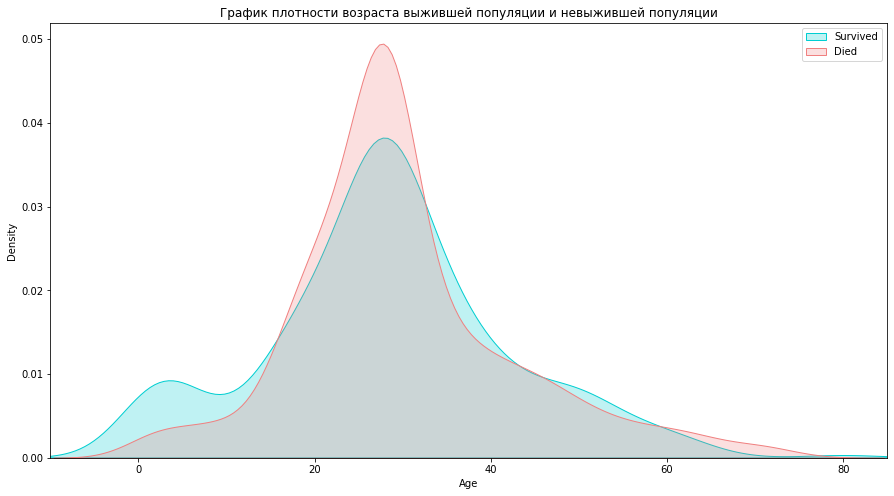

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('График плотности возраста выжившей популяции и невыжившей популяции')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Распределение по возрасту выживших и умерших на самом деле очень похоже. Одно заметное отличие заключается в том, что среди выживших большую долю составляли дети. Пассажиры, очевидно, предприняли попытку спасти детей, предоставив им место на спасательных плотах.
Учитывая выживаемость пассажиров младше 16 лет, я также включу в свой набор данных еще одну категориальную переменную: "Minor".

In [25]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

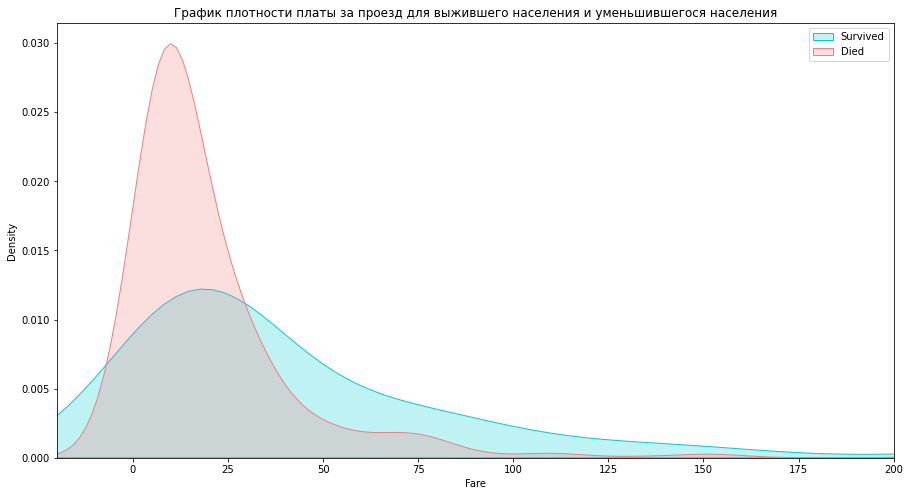

In [40]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('График плотности платы за проезд для выжившего населения и уменьшившегося населения')
ax.set(xlabel='Fare')
plt.xlim(-20g,200)
plt.show()

Поскольку распределения явно различаются для тарифов выживших и умерших, вполне вероятно, что это будет важным фактором прогнозирования в нашей окончательной модели. У пассажиров, которые заплатили за проезд по более низкой цене, по-видимому, было меньше шансов выжить. Вероятно, это сильно коррелирует с классом пассажиров, который мы рассмотрим далее.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


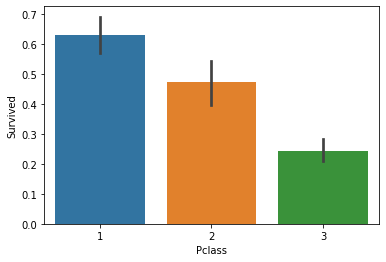

In [27]:
sns.barplot('Pclass', 'Survived', data=data_train)
plt.show()

Неудивительно, что быть пассажиром первого класса было безопаснее всего.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


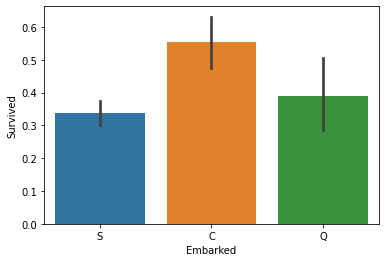

In [28]:
sns.barplot('Embarked', 'Survived', data=data_train)
plt.show()

Пассажиры, поднявшиеся на борт в Шербуре, Франция, по-видимому, имеют самый высокий показатель выживаемости. У пассажиров, поднявшихся на борт в Саутгемптоне, было незначительно меньше шансов выжить, чем у тех, кто поднялся на борт в Квинстауне. Вероятно, это связано с классом пассажира или, возможно, даже с порядком распределения комнат (например, возможно, у более ранних пассажиров было больше шансов занять комнаты ближе к палубе).

4.1.2. Ранжирование объектов с рекурсивным устранением объектов и перекрестной проверкой
RFECV выполняет RFE в цикле перекрестной проверки, чтобы найти оптимальное количество или наилучший набор функций. Далее в логистической регрессии применяется рекурсивное устранение признаков с автоматической настройкой количества признаков, выбранных с помощью перекрестной проверки.

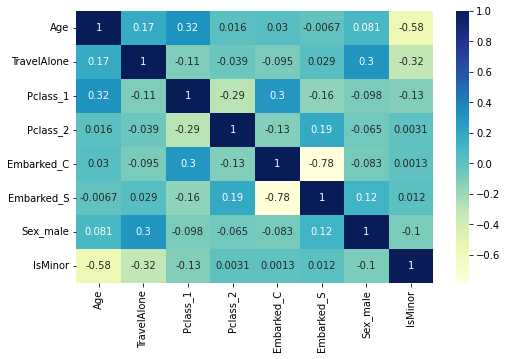

In [29]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")
plt.show()

Оценка модели на основе простого разделения использованием функции train_test_split()

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train = final_train.drop('Survived', axis=1)
y_train = final_train['Survived']
X_train.shape, y_train.shape, final_test.shape

((891, 11), (891,), (418, 11))

In [31]:
logistic = LogisticRegression(max_iter=1000, tol=0.0001,  C=0.01)
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(final_test)
acc_logistic = round(logistic.score(X_train, y_train) * 100, 4)
print("Accurancy on train_data", acc_logistic)

Accurancy on train_data 74.6352


In [32]:
print("Accurancy on test_data", metrics.accuracy_score(data_gender_submission['Survived'], y_pred_logistic))

Accurancy on test_data 0.7631578947368421


In [33]:
print(metrics.classification_report(data_gender_submission['Survived'], y_pred_logistic))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       266
           1       0.78      0.48      0.60       152

    accuracy                           0.76       418
   macro avg       0.77      0.70      0.71       418
weighted avg       0.77      0.76      0.75       418



<AxesSubplot:>

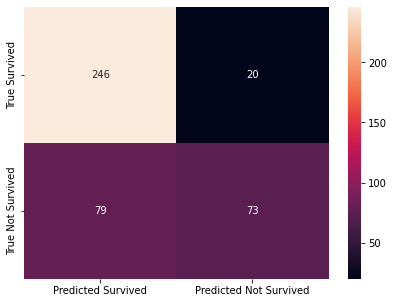

In [34]:
class_names = ['Survived', 'Not Survived']
cnf_matrix = metrics.confusion_matrix(data_gender_submission['Survived'], y_pred_logistic)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

Высокое значение C говорит модели о необходимости придавать больший вес данным обучения. Меньшее значение C будет указывать на то, что модель придает сложности больший вес за счет подгонки данных. Таким образом, высокое значение гиперпараметра C указывает на то, что обучающие данные более важны и отражают данные реального мира, тогда как низкое значение прямо противоположно этому.

In [35]:
from sklearn.model_selection import GridSearchCV
C = [0.5, 1, 5, 10]
tuned_parameters = [{'C': C}]
model = GridSearchCV(logistic, tuned_parameters, scoring = 'accuracy', cv=2)
model.fit(X_train, y_train)
model.best_score_, model.best_params_

(0.7710510404595152, {'C': 0.5})

In [36]:
logistic = LogisticRegression(max_iter=1000, tol=0.0001, C = 0.5)
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(final_test)
acc_logistic = round(logistic.score(X_train, y_train) * 100, 4)
print("Accurancy on train_data", acc_logistic)

Accurancy on train_data 80.3591


In [37]:
print("Accurancy on test_data", metrics.accuracy_score(data_gender_submission['Survived'], y_pred_logistic))

Accurancy on test_data 0.9425837320574163


In [38]:
print(metrics.classification_report(data_gender_submission['Survived'], y_pred_logistic))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       266
           1       0.93      0.91      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



<AxesSubplot:>

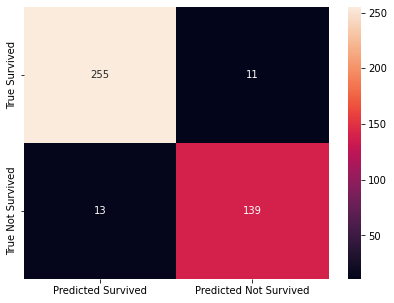

In [39]:
class_names = ['Survived', 'Not Survived']
cnf_matrix = metrics.confusion_matrix(data_gender_submission['Survived'], y_pred_logistic)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')